In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

import random

Using TensorFlow backend.


In [2]:
mnist = pd.read_csv("../datasets/mnist_train_small.csv", header=None).values

In [3]:
X, y = mnist[:, 1:], mnist[:, 0]

In [24]:
in_disc = Input(shape=(784,))
x = Dense(400, activation="relu")(in_disc)
x = Dense(200, activation="relu")(x)
x = Dense(100, activation="relu")(x)
x = Dense(10, activation="relu")(x)
out = Dense(1, activation="sigmoid")(x)

In [25]:
disc = Model(in_disc, out)

In [26]:
in_gen = Input(shape=(50,))
x = Dense(100, activation="relu")(in_gen)
x = Dense(200, activation="relu")(x)
x = Dense(400, activation="relu")(x)
out = Dense(784, activation="sigmoid")(x)

In [27]:
gen = Model(in_gen, out)

In [28]:
in_gan = Input(shape=(50,))
layer_gen = gen(in_gan)
layer_disc = disc(layer_gen)

In [29]:
gan = Model(in_gan, layer_disc)

In [30]:
gan.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 50)                0         
_________________________________________________________________
model_5 (Model)              (None, 784)               420084    
_________________________________________________________________
model_4 (Model)              (None, 1)                 415321    
Total params: 835,405
Trainable params: 835,405
Non-trainable params: 0
_________________________________________________________________


In [31]:
X_mod = X / 255

In [32]:
gan.compile(optimizer="adam", loss="binary_crossentropy")

In [33]:
disc.compile(optimizer="adam", loss="binary_crossentropy")

In [34]:
gen.compile(optimizer="adam", loss="binary_crossentropy")

/usr/local/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


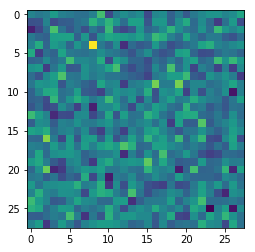

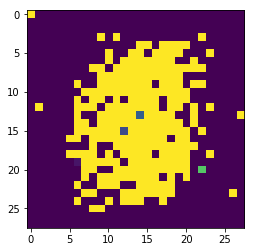

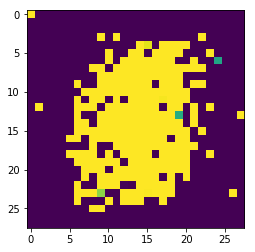

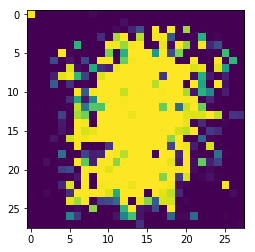

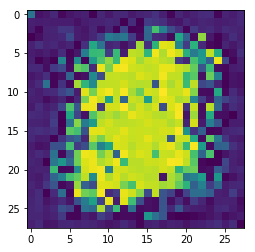

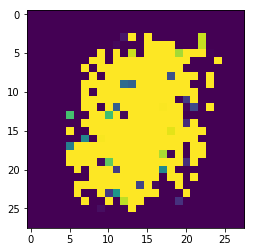

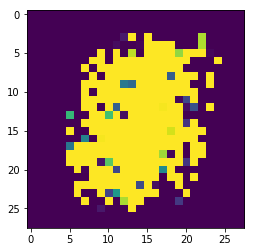

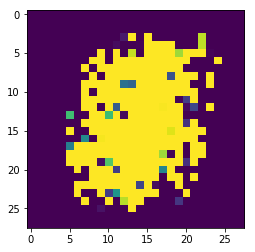

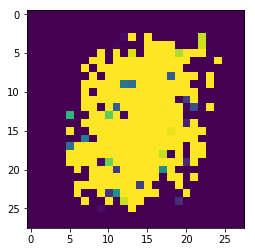

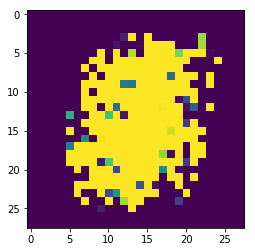

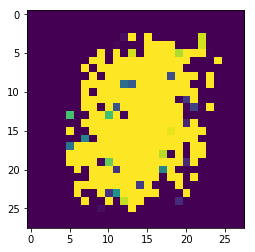

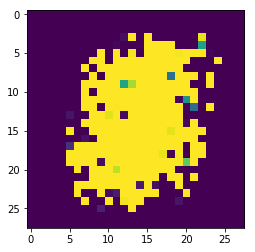

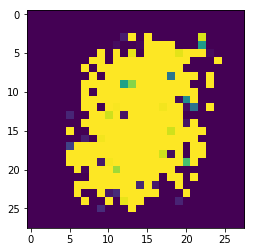

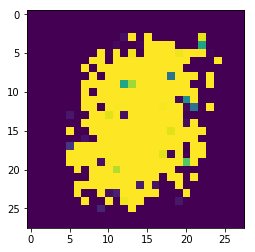

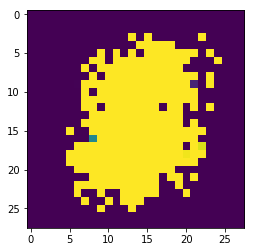

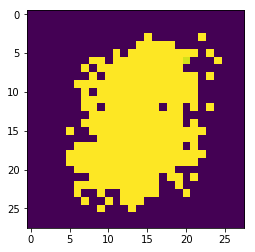

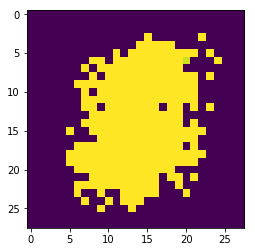

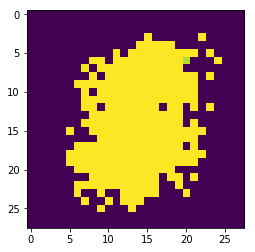

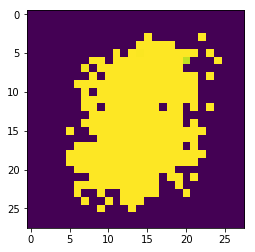

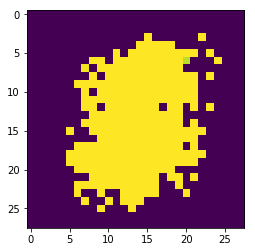

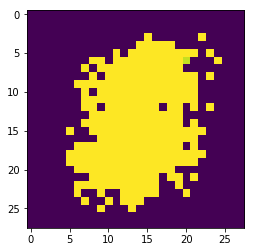

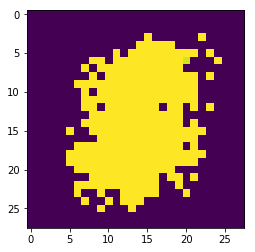

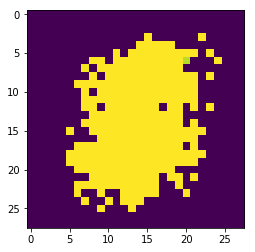

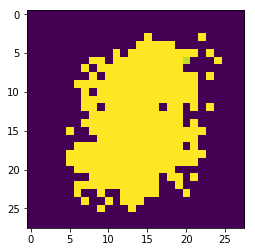

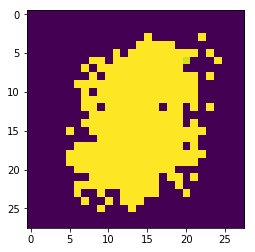

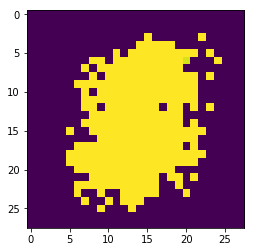

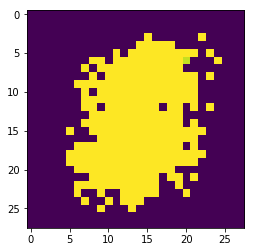

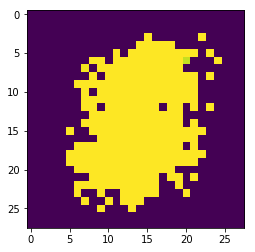

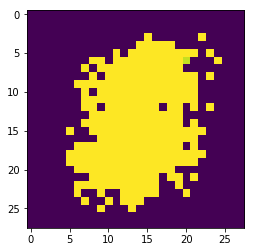

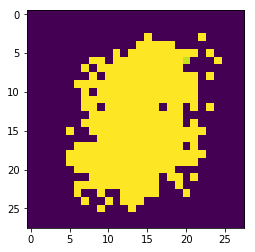

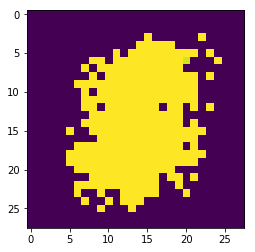

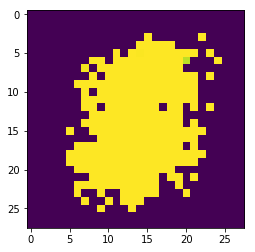

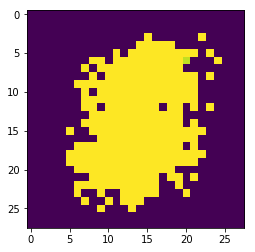

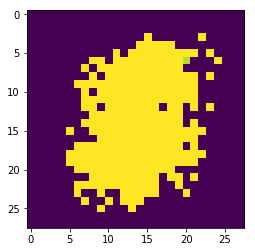

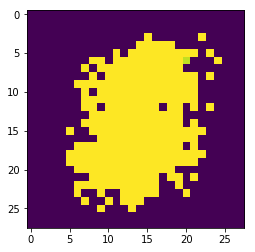

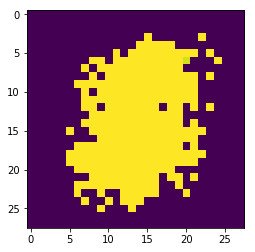

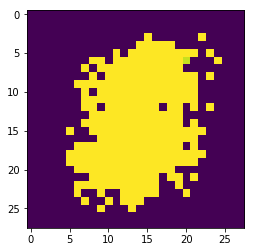

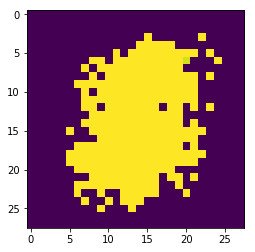

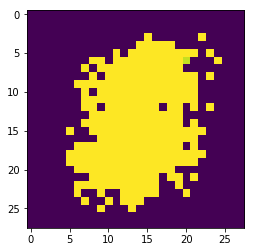

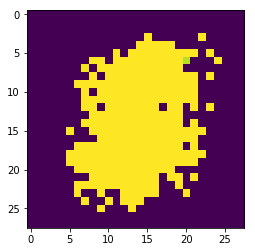

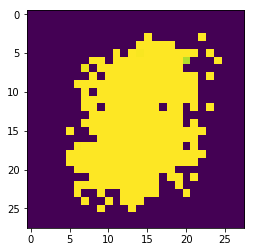

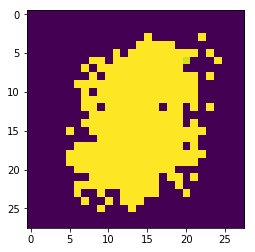

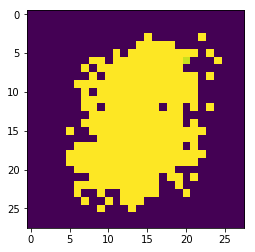

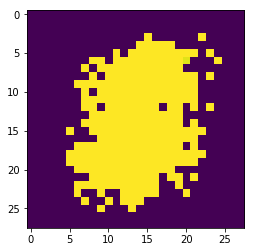

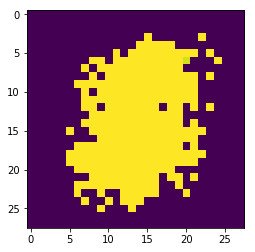

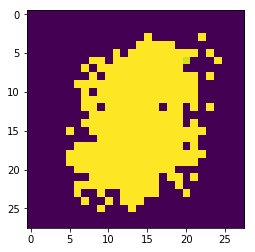

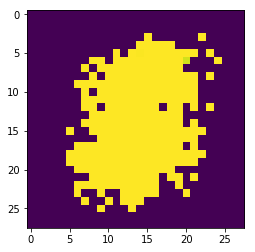

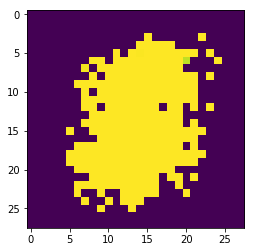

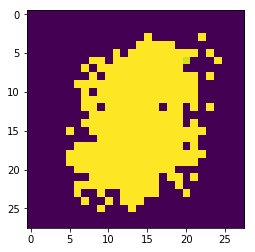

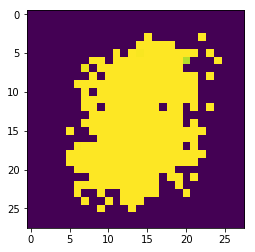

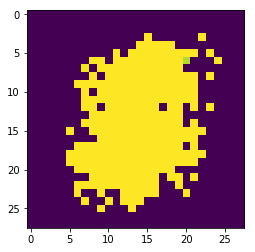

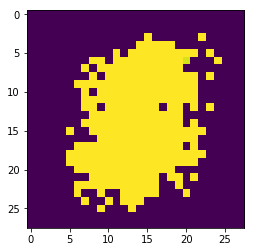

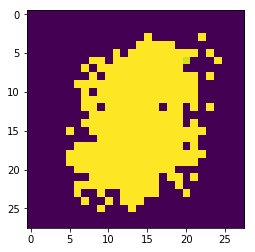

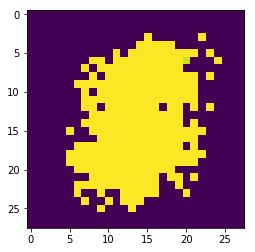

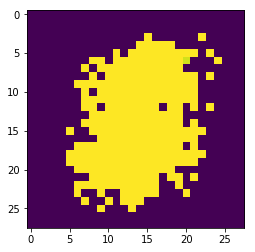

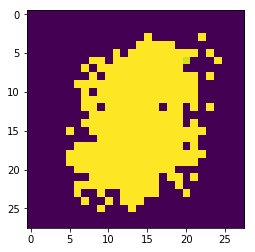

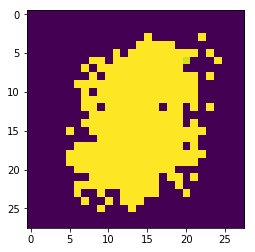

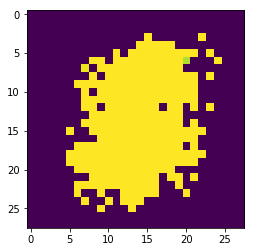

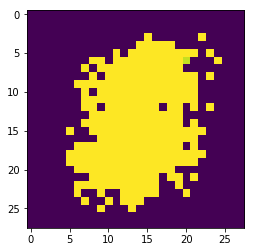

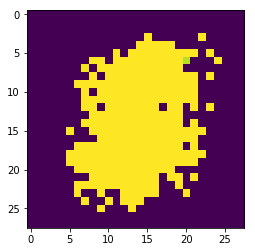

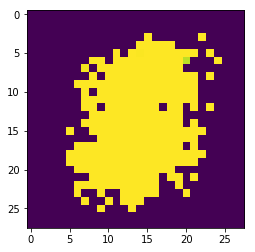

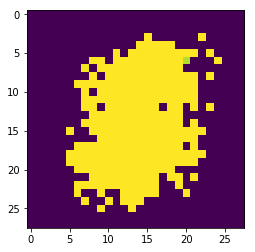

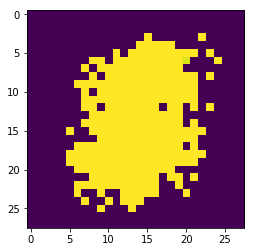

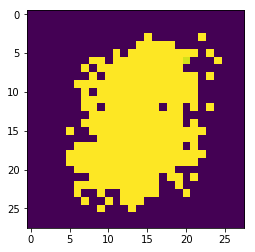

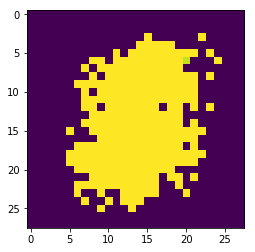

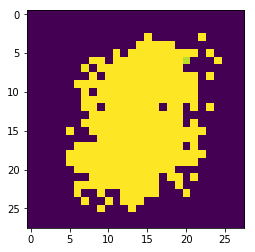

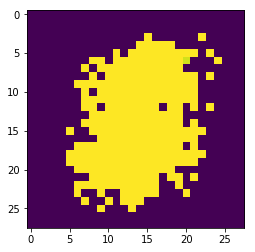

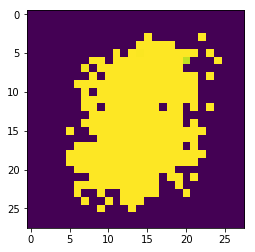

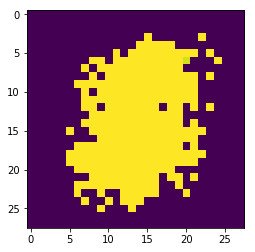

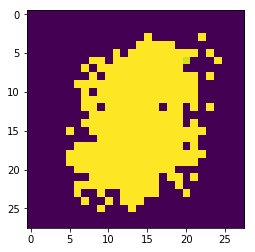

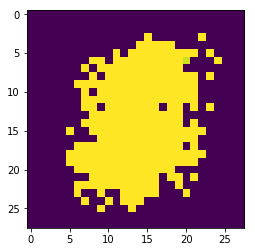

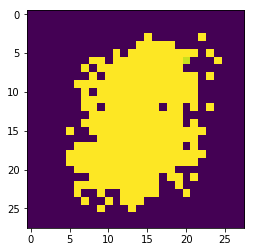

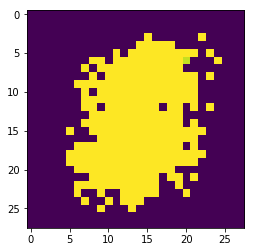

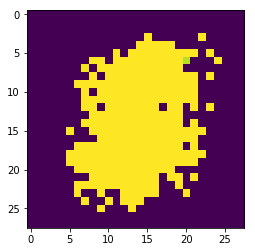

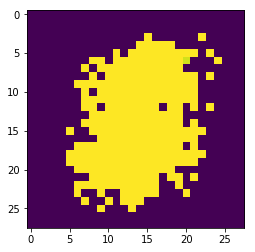

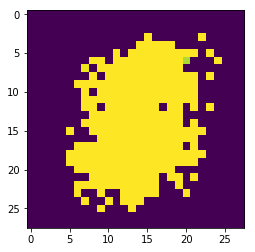

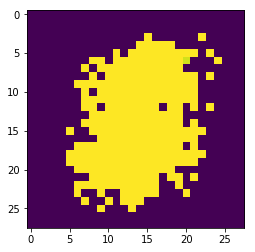

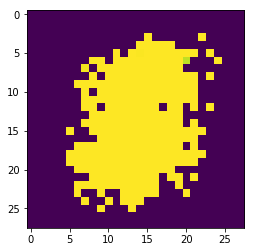

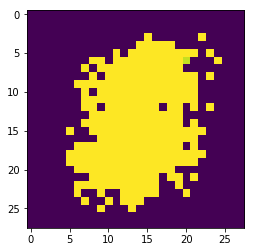

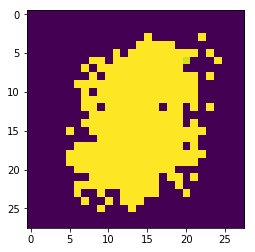

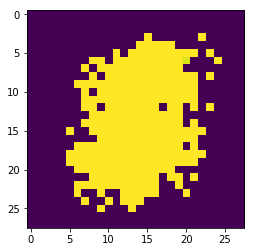

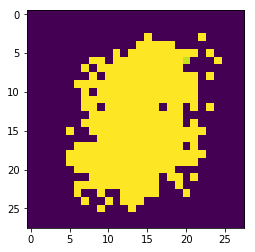

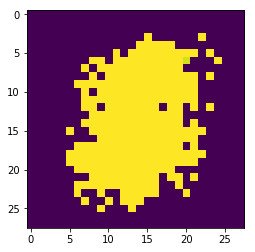

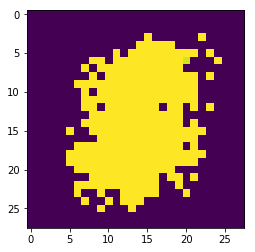

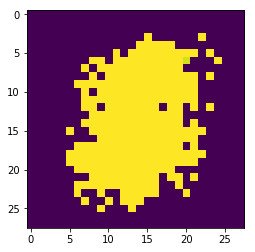

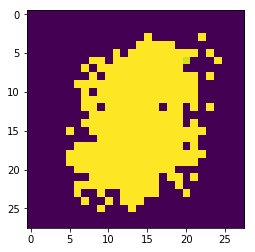

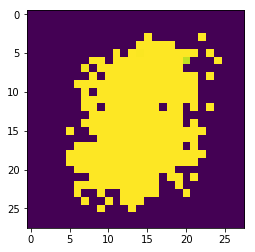

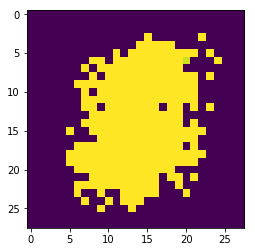

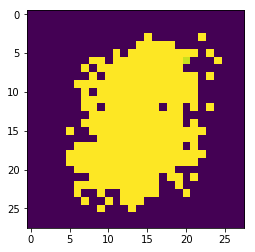

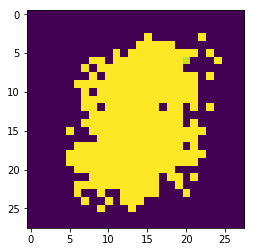

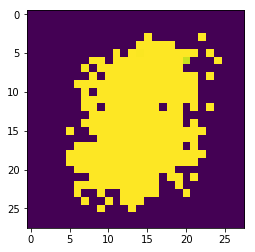

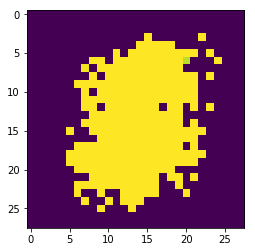

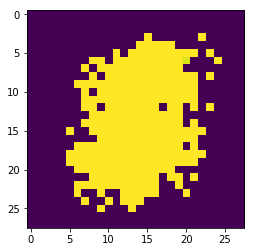

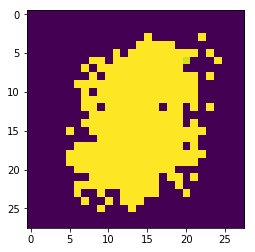

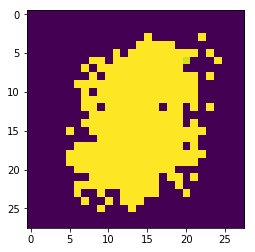

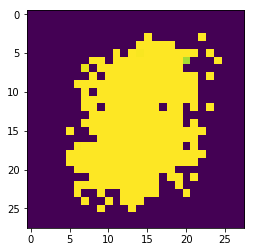

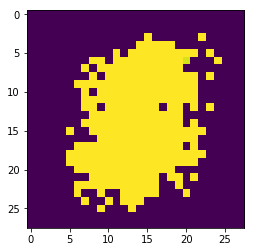

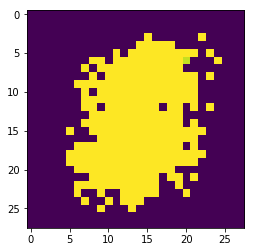

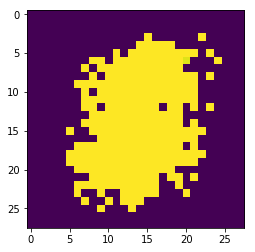

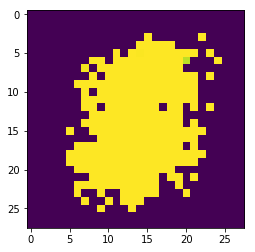

In [48]:
for i in range(100):
    noise = np.random.rand(500, 50)

    pred = gen.predict(noise)
    real = X_mod[np.random.randint(0, len(X_mod), 500)]

    disc_input = np.vstack([pred, real])

    result = np.vstack([np.zeros([500, 1]), np.ones([500, 1])])

    disc.trainable = True
    disc.fit(disc_input, result, batch_size=100, epochs=5, verbose=0)

    disc.trainable = False
    gan.fit(noise, np.ones([500, 1]), batch_size=50, epochs=10, verbose=0)
    
    plt.figure()
    
    plt.imshow(pred[0].reshape(28, 28))

In [42]:
gan.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 50)                0         
_________________________________________________________________
model_5 (Model)              (None, 784)               420084    
_________________________________________________________________
model_4 (Model)              (None, 1)                 415321    
Total params: 1,250,726
Trainable params: 835,405
Non-trainable params: 415,321
_________________________________________________________________


/usr/local/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
